<a href="https://colab.research.google.com/github/zahr-eddine/econV3/blob/master/my_recommanderSysteme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# -*- coding: utf-8 -*-
"""Recommendation System.ipynb
 

A recommendation system seeks to predict the rating or preference a user would give to an item given his old item ratings or preferences. Recommendation systems are used by pretty much every major company in order to enhance the quality of their services.
"""

# Commented out IPython magic to ensure Python compatibility.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings

from keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from keras.models import Model
from keras.models import load_model

warnings.filterwarnings('ignore')
# %matplotlib inline
 

Using TensorFlow backend.


Epoch 1/5
636/636 [==============================] - 0s 453us/step - loss: 7.5880
Epoch 2/5
636/636 [==============================] - 0s 45us/step - loss: 7.5849
Epoch 3/5
636/636 [==============================] - 0s 53us/step - loss: 7.5816
Epoch 4/5
636/636 [==============================] - 0s 59us/step - loss: 7.5772
Epoch 5/5
160/160 [==============================] - 0s 215us/step
[-0.00981542] 1
[0.00050203] 4
[0.00905949] 4
[-0.00579746] 1
[-0.00060232] 3
[0.00507162] 3
[0.00096887] 3
[-0.00319212] 1
[-0.00246156] 1
[0.00459675] 2
Epoch 1/5
636/636 [==============================] - 0s 426us/step - loss: 6.8362
Epoch 2/5
636/636 [==============================] - 0s 67us/step - loss: 4.1904
Epoch 3/5
636/636 [==============================] - 0s 62us/step - loss: 1.6005
Epoch 4/5
636/636 [==============================] - 0s 59us/step - loss: 1.3022
Epoch 5/5
160/160 [==============================] - 0s 153us/step
[2.6185088] 1
[2.5149932] 4
[2.3056028] 4
[2.656846] 1
[2.373

array([-0.00138757], dtype=float32)

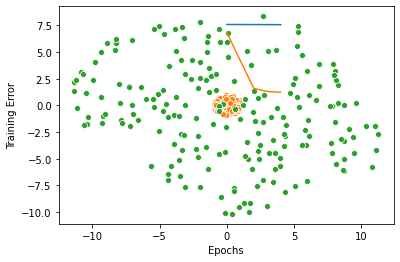

In [2]:


"""## Loading in data"""

headers = ["tweet_id","user_id","likes"]
dataset =pd.read_csv("tweet_rum_non_rum_recommender3.csv", skiprows=1, header = None , 
                names= headers ,delimiter=",", encoding='utf-8')

dataset

dataset.shape

from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2, random_state=42)
train.head()
test.head()

n_users = len(dataset.user_id.unique())
n_users

n_tweets = len(dataset.tweet_id.unique())
n_tweets



# creating book embedding path
tweet_input = Input(shape=[1], name="Tweet-Input")
tweet_embedding = Embedding(n_tweets+1, 5, name="Tweet-Embedding")(tweet_input)
tweet_vec = Flatten(name="Flatten-Tweets")(tweet_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# performing dot product and creating model
prod = Dot(name="Dot-Product", axes=1)([tweet_vec, user_vec])
model = Model([user_input, tweet_input], prod)
model.compile('adam', 'mean_squared_error')



if os.path.exists('regression_model.h5'):
    model = load_model('regression_model.h5')
else:
    history = model.fit([train.user_id, train.tweet_id], train.likes, epochs=5, verbose=1)
    model.save('regression_model.h5')
    plt.plot(history.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

model.evaluate([test.user_id, test.tweet_id], test.likes)

predictions = model.predict([test.user_id.head(10), test.tweet_id.head(10)])

[print(predictions[i], test.likes.iloc[i]) for i in range(0,10)]

"""## Creating Neural Network
Neural Networks proved there effectivness for almost every machine learning problem as of now and they also perform exceptionally well for recommendation systems.
"""

# creating tweet embedding path
tweet_input = Input(shape=[1], name="Tweet-Input")
tweet_embedding = Embedding(n_tweets+1, 5, name="Tweet-Embedding")(tweet_input)
tweet_vec = Flatten(name="Flatten-Tweets")(tweet_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# concatenate features
conc = Concatenate()([tweet_vec, user_vec])
 
# add fully-connected-layers
fc1 = Dense(128, activation='relu')(conc)
fc2 = Dense(32, activation='relu')(fc1)
out = Dense(1)(fc2)

# Create model and compile it
model2 = Model([user_input, tweet_input], out)
model2.compile('adam', 'mean_squared_error')

from keras.models import load_model

if os.path.exists('regression_model2.h5'):
    model2 = load_model('regression_model2.h5')
else:
    history = model2.fit([train.user_id, train.tweet_id], train.likes, epochs=5, verbose=1)
    model2.save('regression_model2.h5')
    plt.plot(history.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

model2.evaluate([test.user_id, test.tweet_id], test.likes)

predictions = model2.predict([test.user_id.head(10), test.tweet_id.head(10)])

[print(predictions[i], test.likes.iloc[i]) for i in range(0,10)]

"""## Visualizing Embeddings
Embeddings are weights that are learned to represent some specific variable like books and user in our case and therefore we can not only use them to get good results on our problem but also to extract inside about our data.
"""

# Extract embeddings
tweet_em = model.get_layer('Tweet-Embedding')
tweet_em_weights = tweet_em.get_weights()[0]

tweet_em_weights[:5]

from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
pca_result = pca.fit_transform(tweet_em_weights)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])

tweet_em_weights = tweet_em_weights / np.linalg.norm(tweet_em_weights, axis = 1).reshape((-1, 1))
tweet_em_weights[0][:10]
np.sum(np.square(tweet_em_weights[0]))

pca = PCA(n_components=2)
pca_result = pca.fit_transform(tweet_em_weights)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tnse_results = tsne.fit_transform(tweet_em_weights)

sns.scatterplot(x=tnse_results[:,0], y=tnse_results[:,1])

"""## Making Recommendations"""

# Creating dataset for making recommendations for the first user
tweet_data = np.array(list(set(dataset.tweet_id)))
tweet_data[:5]

#len book_data len(book_data)= 59 but users is just 29 
user = np.array([1 for i in range(1,2)])
print(user)
user[:5]

predictions = model.predict([user, tweet_data])
predictions = np.array([a[0] for a in predictions])
#print(predictions)
recommended_tweet_ids = (-predictions).argsort()
print(recommended_tweet_ids)
print(len(recommended_tweet_ids))

# print predicted scores
predictions[recommended_tweet_ids]
 